Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [5]:
airbnb <- read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [6]:
## creamos la columna Square.Meters
airbnb$Square.Meters <- airbnb$Square.Feet * 0.092903

## eliminnamos ademas la columna Square.Feet, ya que no nos hace falta al tener la nueva en metros cuadrados.
airbnbFiltroCol <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude', 'Square.Meters')]
head(airbnbFiltroCol)

City      Room.Type       Neighbourhood       Accommodates Bathrooms Bedrooms
1 Barcelona Entire home/apt El Gòtic            2            1         0       
2 Barcelona Entire home/apt El Raval            6            1         2       
3 Barcelona Entire home/apt Dreta de l'Eixample 5            1         2       
4 Barcelona Entire home/apt La Sagrada Família  5            1         2       
5 Barcelona Entire home/apt La Sagrada Família  6            1         2       
6 Barcelona Entire home/apt Sants-Montjuïc      5            2         3       
  Beds Price Guests.Included Extra.People Review.Scores.Rating Latitude
1 1    349   1                0            NA                  41.38389
2 3    165   4               20            93                  41.38266
3 2    129   3               20            94                  41.38847
4 2     90   1                0           100                  41.40259
5 3     89   1                0           100                  41.40501
6 3     68   1                0            84                  41.36726
  Longitude Square.Meters
1 2.171802  NA           
2 2.167558  NA           
3 2.168451  NA           
4 2.176946  NA           
5 2.173369  NA           
6 2.147609  NA

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [7]:
df_madrid <- subset(airbnbFiltroCol, City == 'Madrid' & Room.Type == 'Entire home/apt' & Neighbourhood != '')
borrarCol <- c('Room.Type', 'City')
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrarCol)]
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:
porcentajeNA <- round(sum(is.na(df_madrid$Square.Meters) / nrow(df_madrid)) * 100 , 2)
paste("El porcentaje de NA en la columna Square.Meters es: ", porcentajeNA)

[1] "El porcentaje de NA en la columna Square.Meters es:  93.8"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [9]:
porcentaje0 <- round(sum(df_madrid$Square.Meters == 0,na.rm=T) / sum(!is.na(df_madrid$Square.Meters)) * 100 , 2)
paste("El porcentaje de 0 es: ", porcentaje0)

[1] "El porcentaje de 0 es:  36.89"

Reemplazar todos los 0m^2 por NA 

In [14]:
library(dplyr)
library(ggplot2)

## <font color='red'>**Comentarios**</font>

He añadido estas libreria porque hace falta para el operador %>% y ggplot supongo que las añadistes y la borrastes.

In [15]:

df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))
head(df_madrid)

Neighbourhood       Accommodates Bathrooms Bedrooms Beds Price
1 Almagro             4            1         1        2     60  
2 Almagro             4            2         1        1    141  
3 Almagro             7            3         4        4    230  
4 Rios Rosas          5            1         2        3     88  
5 Fuencarral-el Pardo 5            1         2        2     65  
6 Argüelles           6            2         4        6     78  
  Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
1 3               10           99                   40.43768 -3.699259
2 2               15           87                   40.43640 -3.692044
3 5               30           93                   40.42807 -3.694460
4 2               25           77                   40.43934 -3.698665
5 4               10           NA                   40.47981 -3.725272
6 1                0           NA                   40.43158 -3.718951
  Square.Meters
1 NA           
2 NA           
3 NA           
4 NA           
5 NA           
6 NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


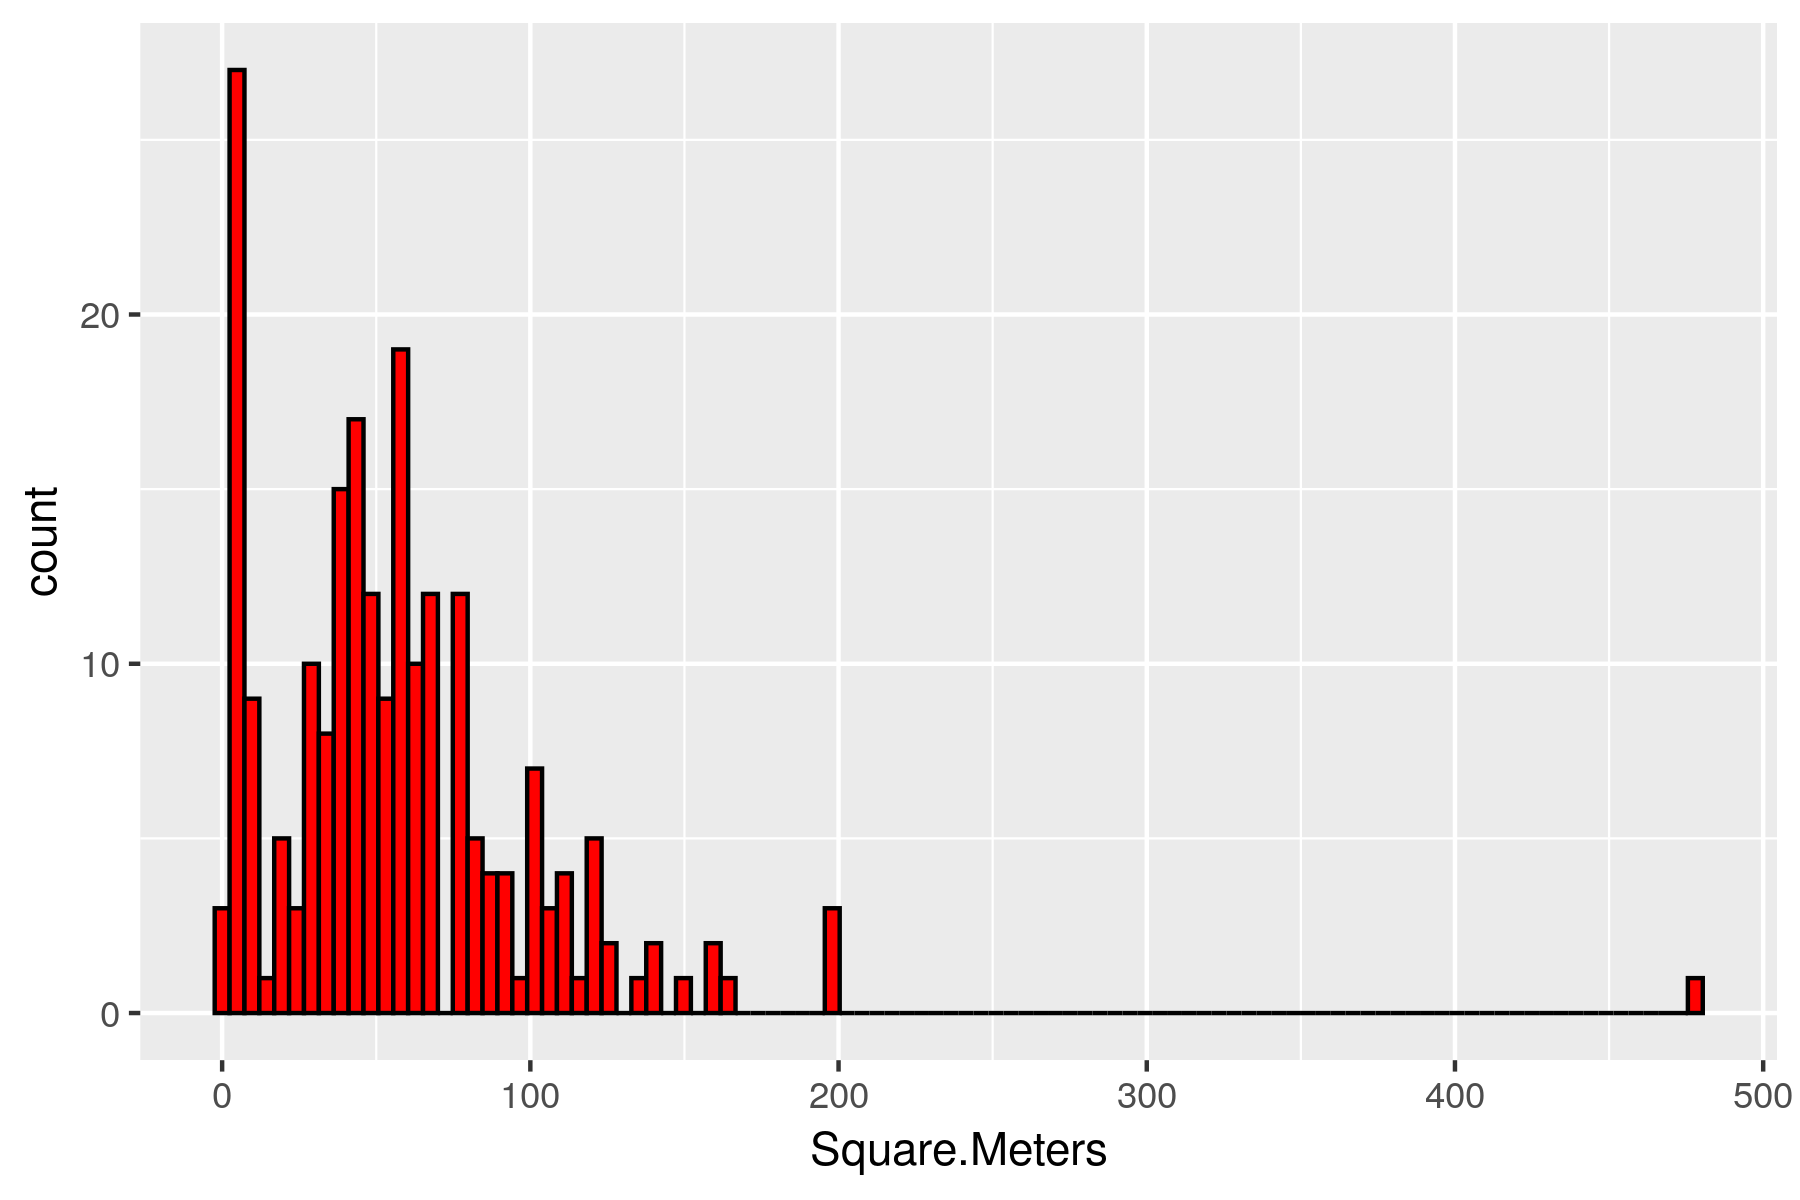

In [16]:
ggplot(df_madrid, aes(x=Square.Meters)) + geom_histogram(bins=100, col='black', fill='red')

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [17]:
df_madrid <- df_madrid %>% mutate(Square.Meters = ifelse(Square.Meters < 20, NA, Square.Meters))
head(df_madrid)

Neighbourhood       Accommodates Bathrooms Bedrooms Beds Price
1 Almagro             4            1         1        2     60  
2 Almagro             4            2         1        1    141  
3 Almagro             7            3         4        4    230  
4 Rios Rosas          5            1         2        3     88  
5 Fuencarral-el Pardo 5            1         2        2     65  
6 Argüelles           6            2         4        6     78  
  Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
1 3               10           99                   40.43768 -3.699259
2 2               15           87                   40.43640 -3.692044
3 5               30           93                   40.42807 -3.694460
4 2               25           77                   40.43934 -3.698665
5 4               10           NA                   40.47981 -3.725272
6 1                0           NA                   40.43158 -3.718951
  Square.Meters
1 NA           
2 NA           
3 NA           
4 NA           
5 NA           
6 NA

In [18]:
## Contamos con 65 barrios en total, eliminamos los barrios que tienen todo NA
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na = sum(is.na(Square.Meters)) / length(Square.Meters)) %>% 
  filter(num_na == 1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighb_all_na$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Quedan  38 barrios"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

In [19]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


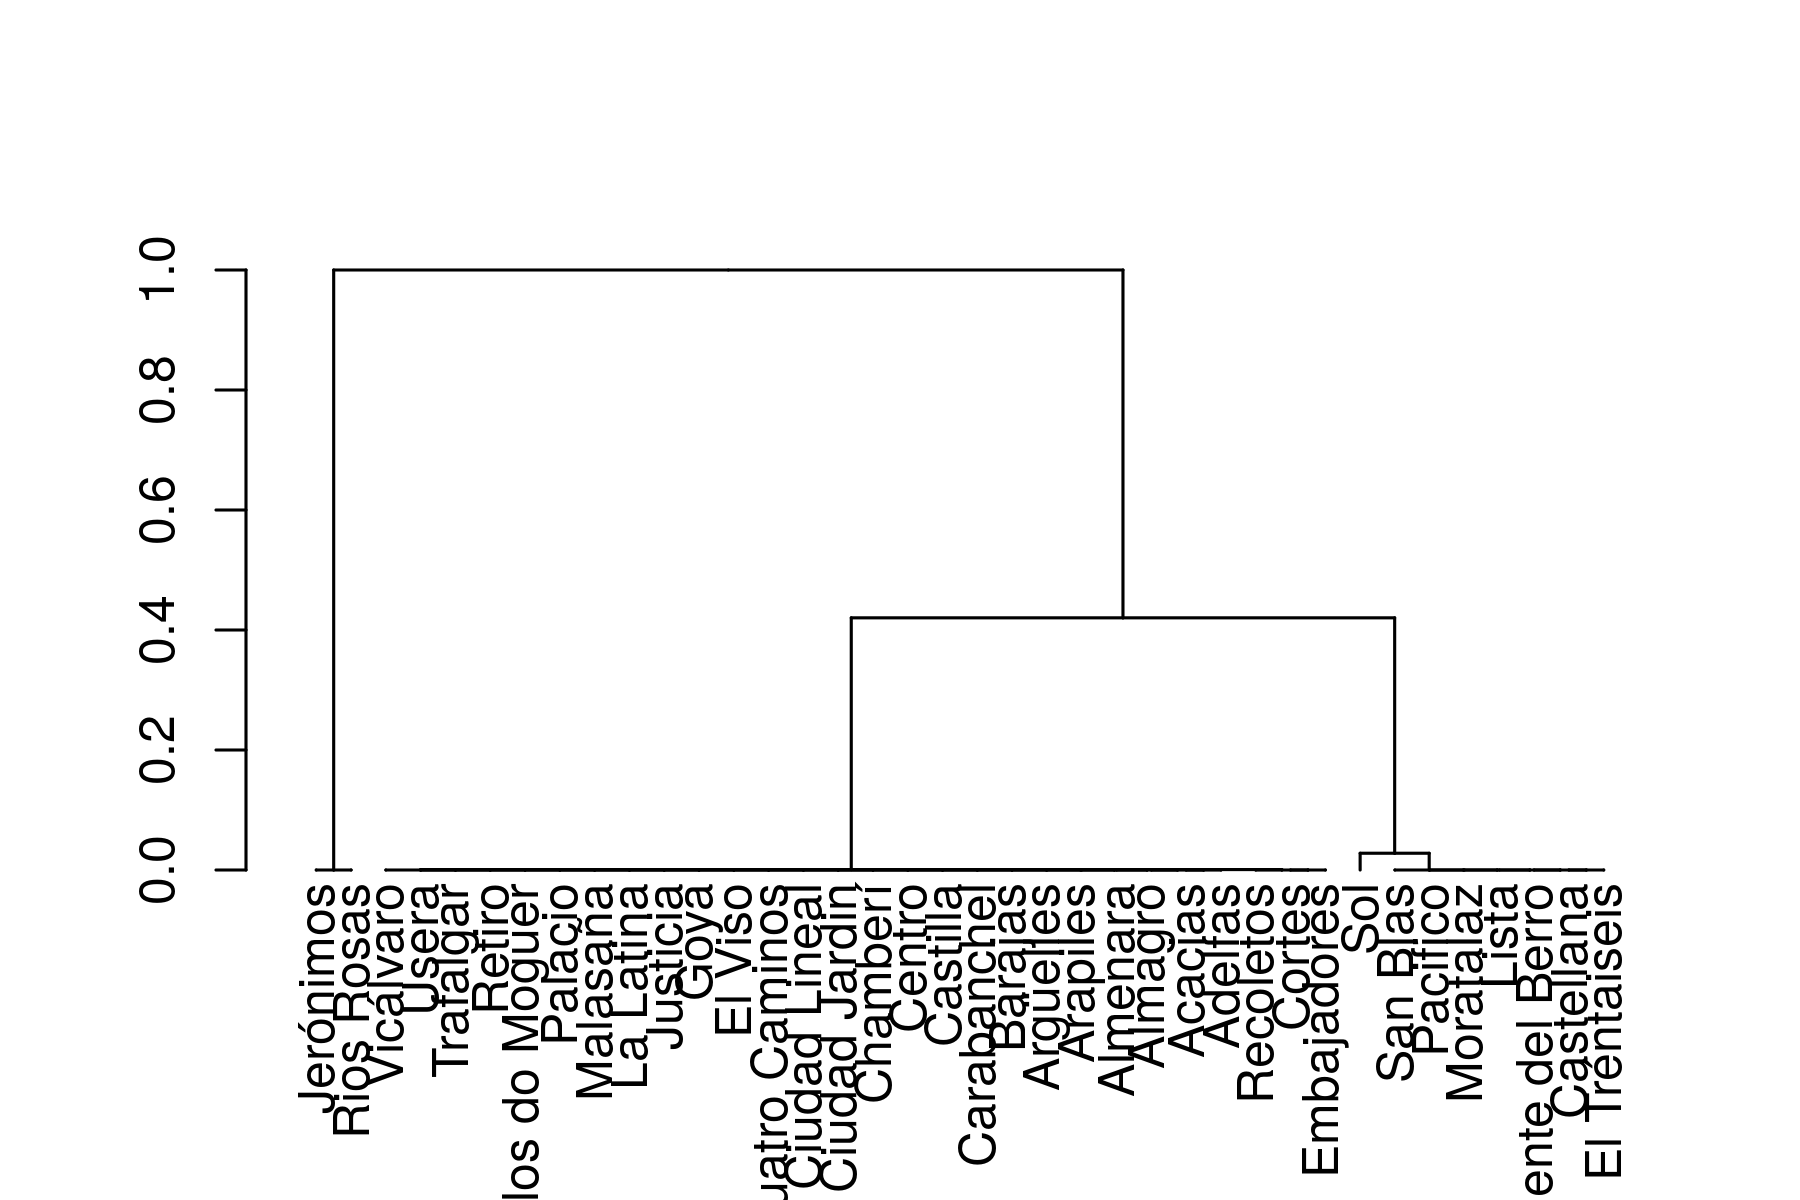

In [20]:
mDist <- as.dist(1 - resm)
hc <- hclust(mDist,method = "complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

In [21]:
## Teniamos 5601 instancias antes de eliminar las que tienen todas sus columnas Na, 
## hemos eliminado 701 imnstancias mas, nos quedamos con 4901 instancias para generar el modelo.
## Al eliminar los barrios con todas la entradas Na el punto de corte es diferente, 
## en estre caso he tomado 0.3, conseguimos tres clusters y un averange de 0.91 que es bastante bueno.

paste(nrow(df_madrid),  " instancias tenemos para generar el modelo")

library(dendextend)
hcd <- as.dendrogram(hc)
hcd<-set(hcd,"labels_cex", 0.45)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
plot(color_branches(hcd,h=0.3),horiz=TRUE,cex=0)
abline(v=0.3,col="red")

[1] "4901  instancias tenemos para generar el modelo"


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




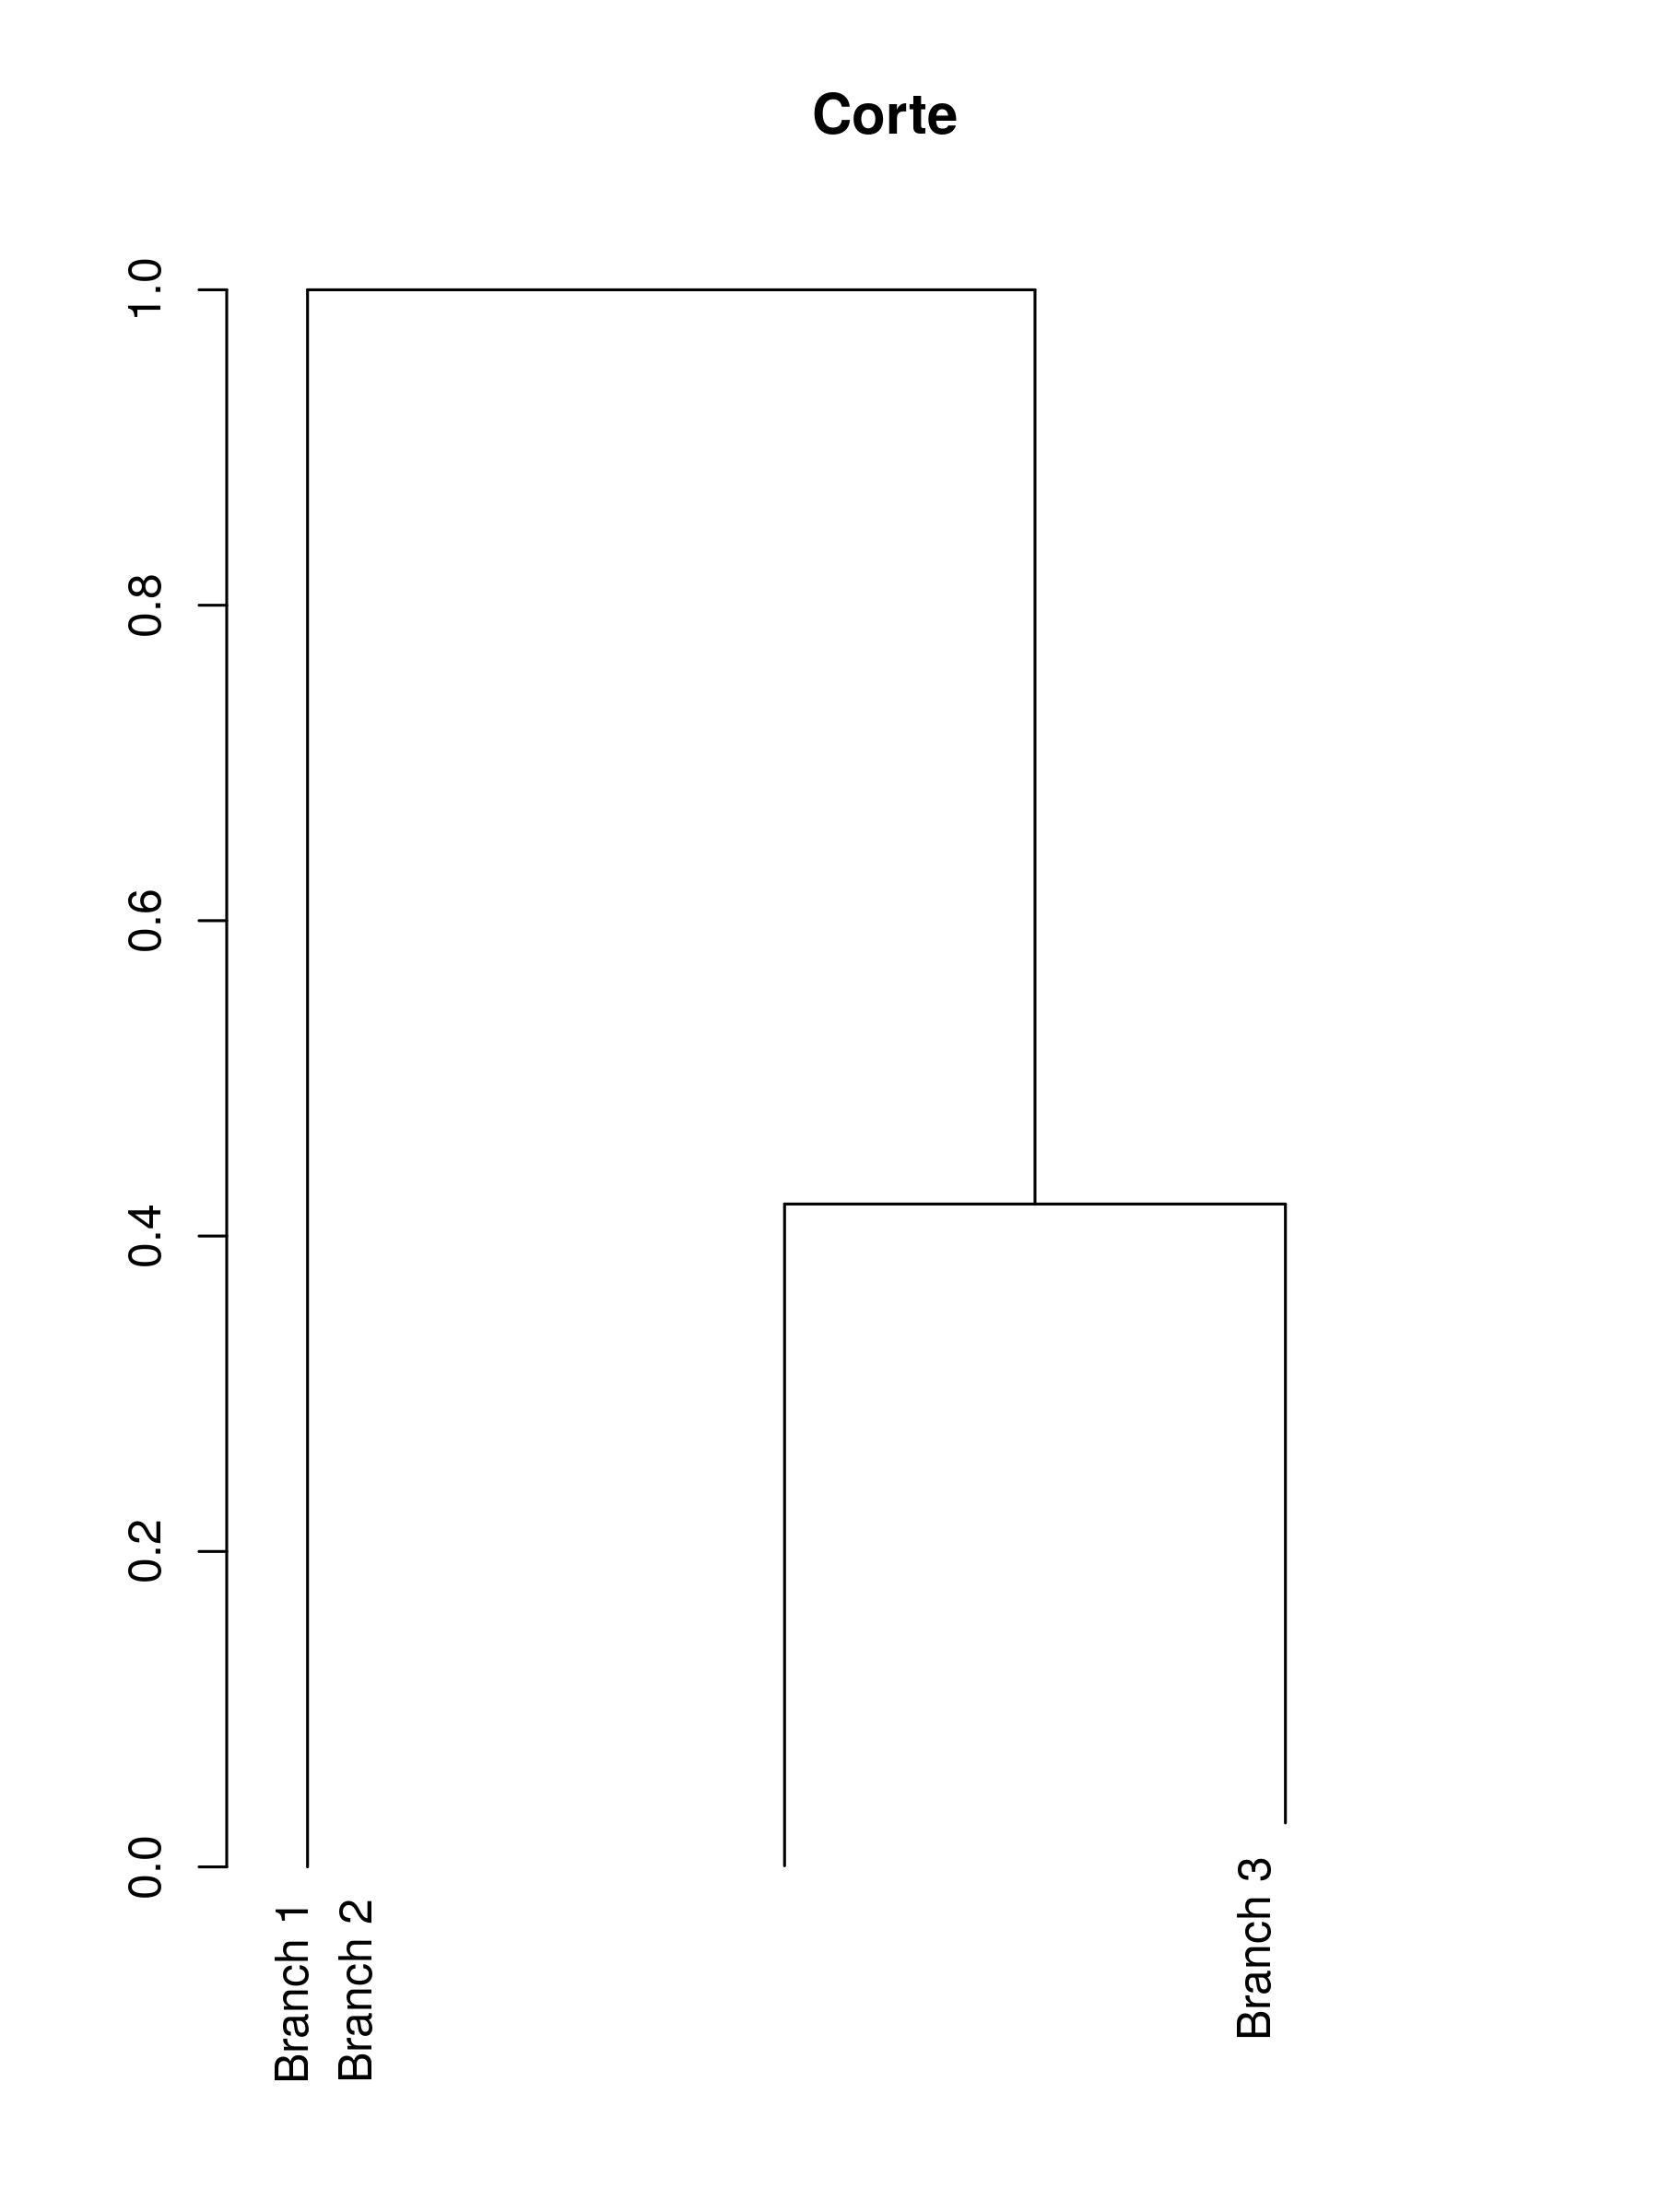

In [22]:
plot(cut(hcd, h = 0.3)$upper, main="Corte", cex=1)

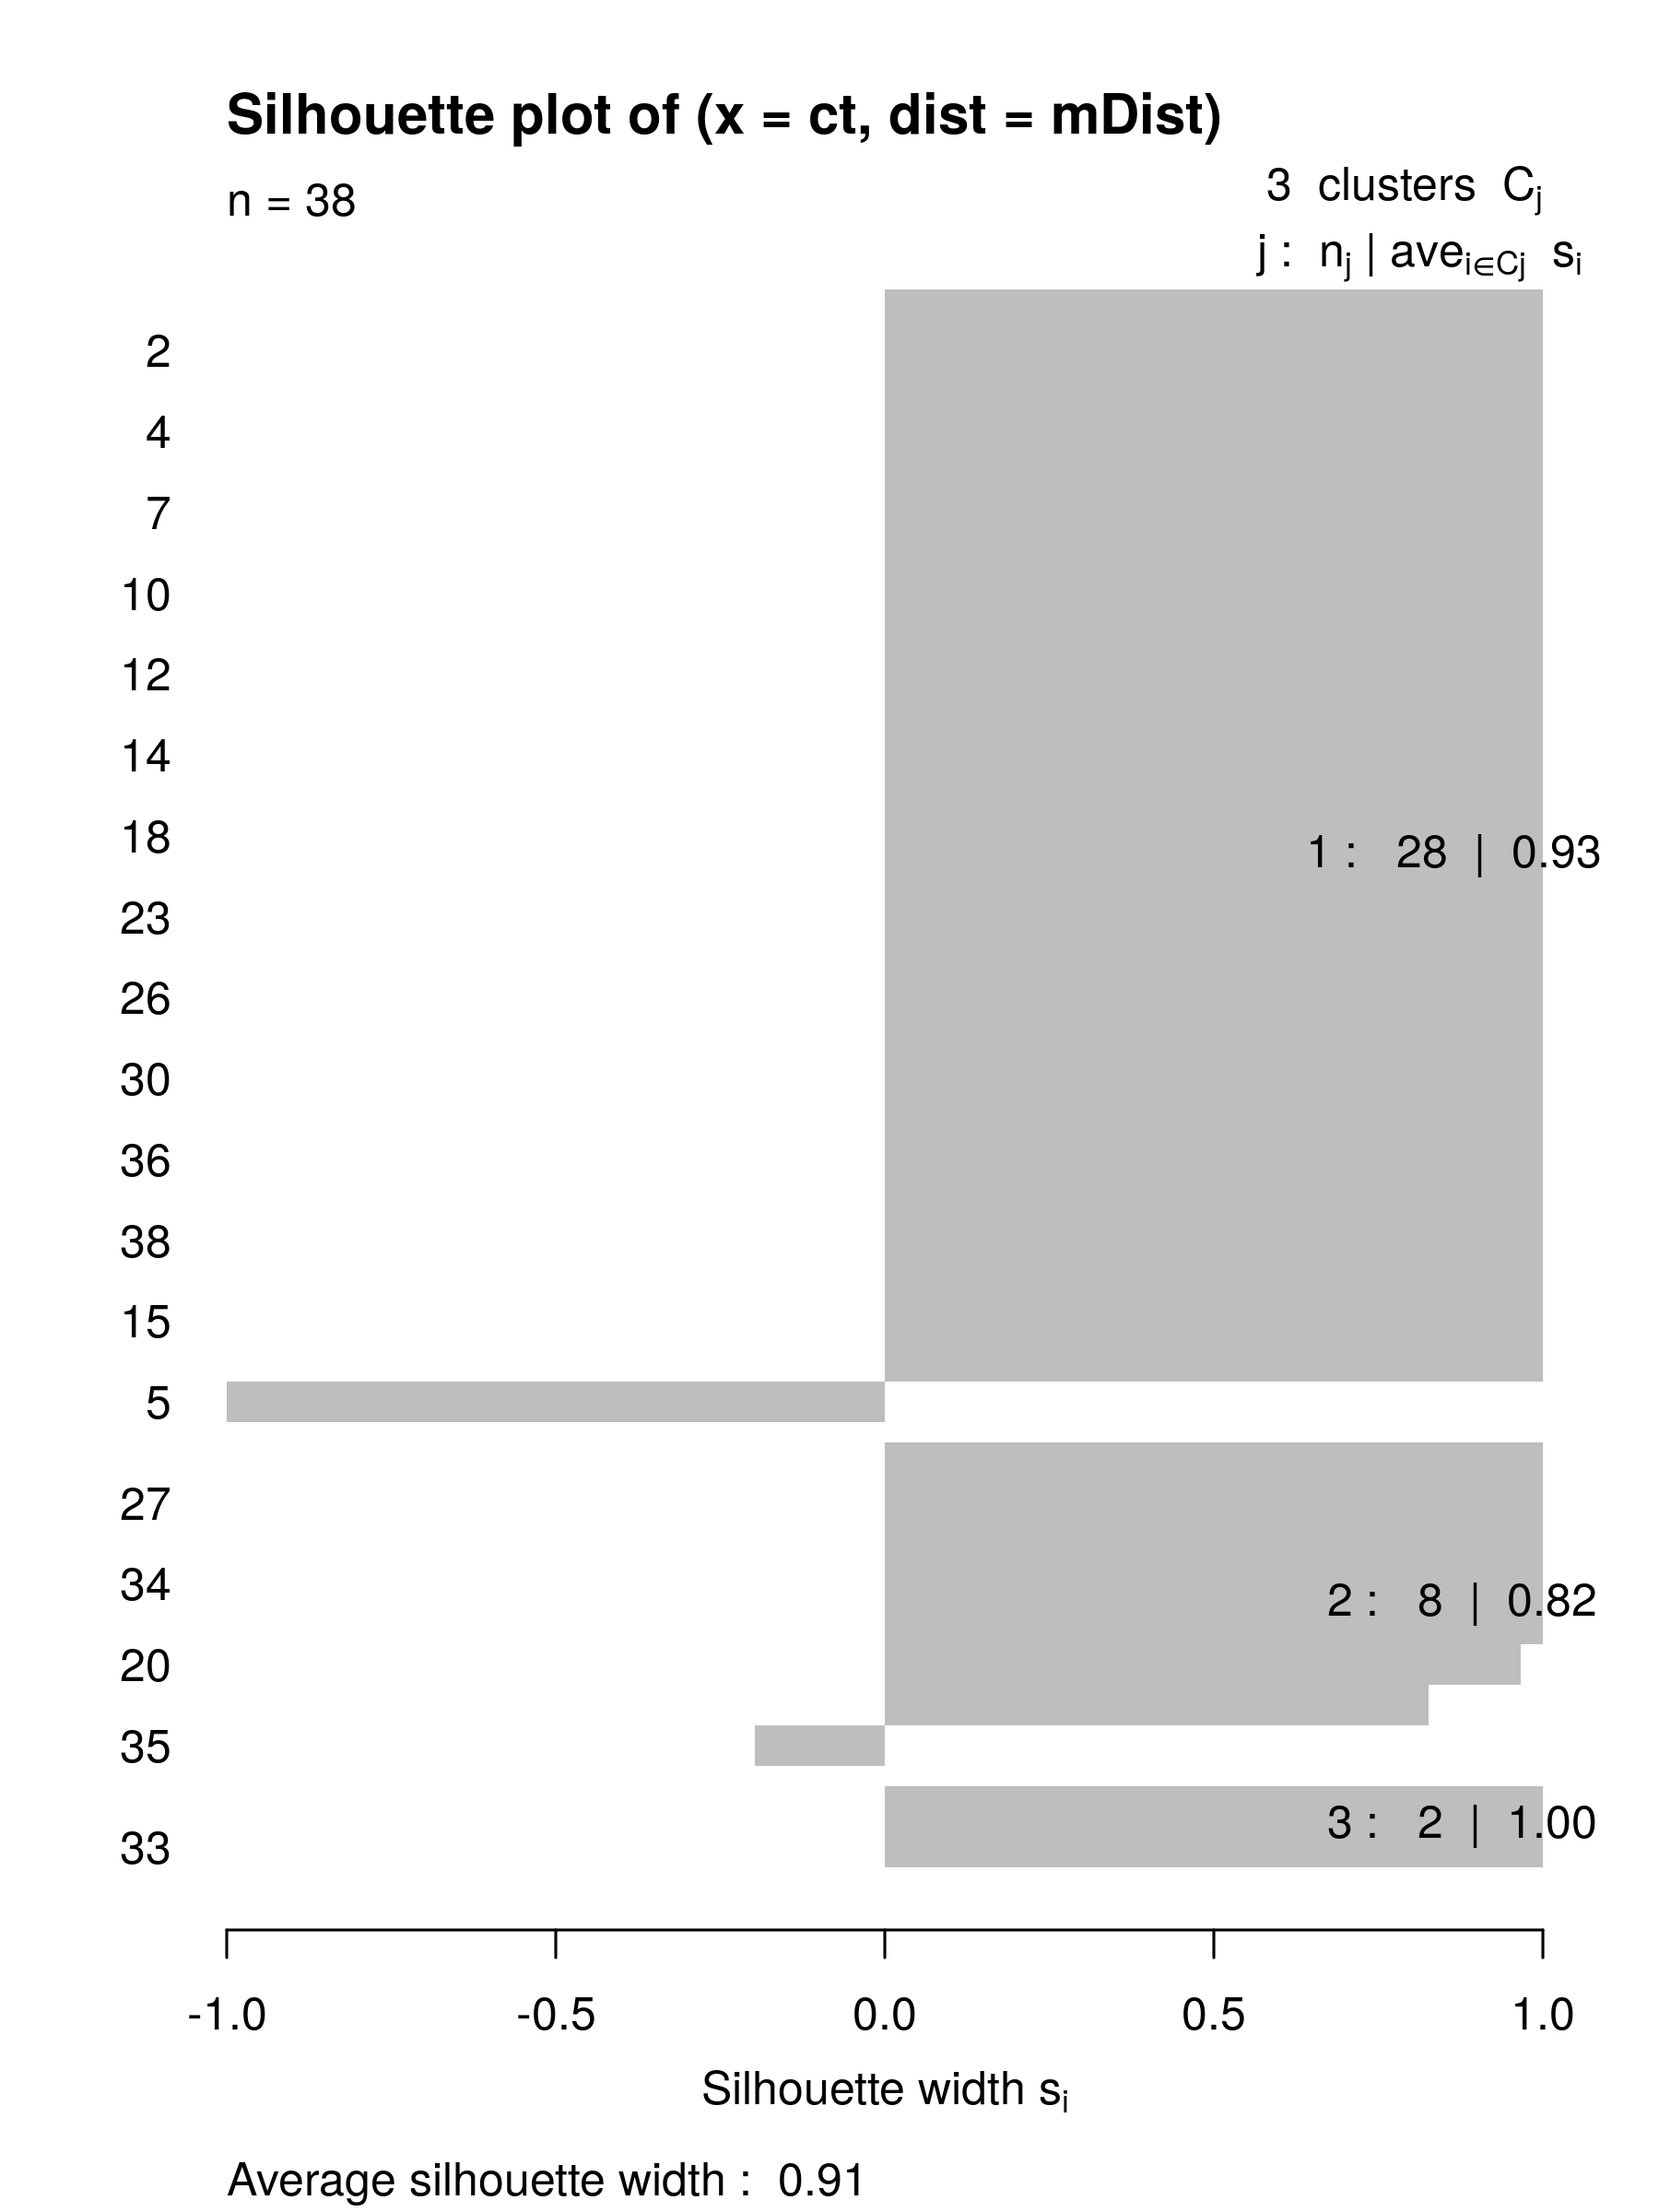

In [23]:
ct <- cutree(hc, h = 0.3)
library(cluster)
sil<-silhouette(ct,mDist)
plot(sil,border=NA)

In [24]:
ct

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                1                1 
      Castellana         Castilla           Centro         Chamberí 
               2                1                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                1                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               2                1                1                2 
            Goya        Jerónimos         Justicia        La Latina 
               1                3                1                1 
           Lista         Malasaña        Moratalaz         Pacifico 
               2                1                2                2 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               1                1                1                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                2                2                1 
           Usera        Vicálvaro 
               1                1

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [25]:
df_barrios <- data.frame(names = names(ct), neighb_id = ct)
head(df_barrios)

names     neighb_id
Acacias   Acacias   1        
Adelfas   Adelfas   1        
Almagro   Almagro   1        
Almenara  Almenara  1        
Arapiles  Arapiles  1        
Argüelles Argüelles 1

In [26]:
## Inserto la columna de los ids de los clusters
df_madrid$Neighbourhood <- factor(df_madrid$Neighbourhood)
df_madrid$neighb_id <- ct[df_madrid$Neighbourhood]

In [27]:
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 3 3 3 33 6 8 8 6 6 14 ...
 $ Accommodates        : int  4 4 7 5 6 4 4 4 3 5 ...
 $ Bathrooms           : num  1 2 3 1 2 1 1 2 2 1 ...
 $ Bedrooms            : int  1 1 4 2 4 2 1 2 2 3 ...
 $ Beds                : int  2 1 4 3 6 2 1 2 2 4 ...
 $ Price               : int  60 141 230 88 78 69 27 100 130 50 ...
 $ Guests.Included     : int  3 2 5 2 1 3 2 4 3 1 ...
 $ Extra.People        : int  10 15 30 25 0 15 6 20 30 0 ...
 $ Review.Scores.Rating: int  99 87 93 77 NA 93 91 97 NA 89 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.69 -3.69 -3.7 -3.72 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : int  1 1 1 3 1 1 1 1 1 1 ...


In [28]:
## Convierto la columna neighb_id en factor para agrupar por cluster
df_madrid$neighb_id <-as.factor(df_madrid$neighb_id)
str(df_madrid)

'data.frame':	4901 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 38 levels "Acacias","Adelfas",..: 3 3 3 33 6 8 8 6 6 14 ...
 $ Accommodates        : int  4 4 7 5 6 4 4 4 3 5 ...
 $ Bathrooms           : num  1 2 3 1 2 1 1 2 2 1 ...
 $ Bedrooms            : int  1 1 4 2 4 2 1 2 2 3 ...
 $ Beds                : int  2 1 4 3 6 2 1 2 2 4 ...
 $ Price               : int  60 141 230 88 78 69 27 100 130 50 ...
 $ Guests.Included     : int  3 2 5 2 1 3 2 4 3 1 ...
 $ Extra.People        : int  10 15 30 25 0 15 6 20 30 0 ...
 $ Review.Scores.Rating: int  99 87 93 77 NA 93 91 97 NA 89 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.69 -3.69 -3.7 -3.72 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : Factor w/ 3 levels "1","2","3": 1 1 1 3 1 1 1 1 1 1 ...


In [29]:
head(df_madrid)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Guests.Included
1 Almagro       4            1         1        2     60   3              
2 Almagro       4            2         1        1    141   2              
3 Almagro       7            3         4        4    230   5              
4 Rios Rosas    5            1         2        3     88   2              
6 Argüelles     6            2         4        6     78   1              
8 Carabanchel   4            1         2        2     69   3              
  Extra.People Review.Scores.Rating Latitude Longitude Square.Meters neighb_id
1 10           99                   40.43768 -3.699259 NA            1        
2 15           87                   40.43640 -3.692044 NA            1        
3 30           93                   40.42807 -3.694460 NA            1        
4 25           77                   40.43934 -3.698665 NA            3        
6  0           NA                   40.43158 -3.718951 NA            1        
8 15           93                   40.39680 -3.713495 NA            1

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [30]:
set.seed(88)
idx <- sample(1:nrow(df_madrid),0.9 * nrow(df_madrid))
train <- df_madrid[idx,]
test <- df_madrid[-idx,]


In [31]:
modelo <- lm(formula=Square.Meters~Accommodates+Price+Bedrooms, train)
summary(modelo)


Call:
lm(formula = Square.Meters ~ Accommodates + Price + Bedrooms, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.205 -13.411  -1.718  10.188 240.207 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.90795    5.60618   0.162 0.871552    
Accommodates  6.99138    1.76343   3.965 0.000112 ***
Price         0.12015    0.03614   3.325 0.001105 ** 
Bedrooms     16.63989    3.85411   4.317  2.8e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.48 on 155 degrees of freedom
  (4251 observations deleted due to missingness)
Multiple R-squared:  0.5871,	Adjusted R-squared:  0.5791 
F-statistic: 73.47 on 3 and 155 DF,  p-value: < 2.2e-16


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Warning message:
“Removed 4249 rows containing non-finite values (stat_bin).”


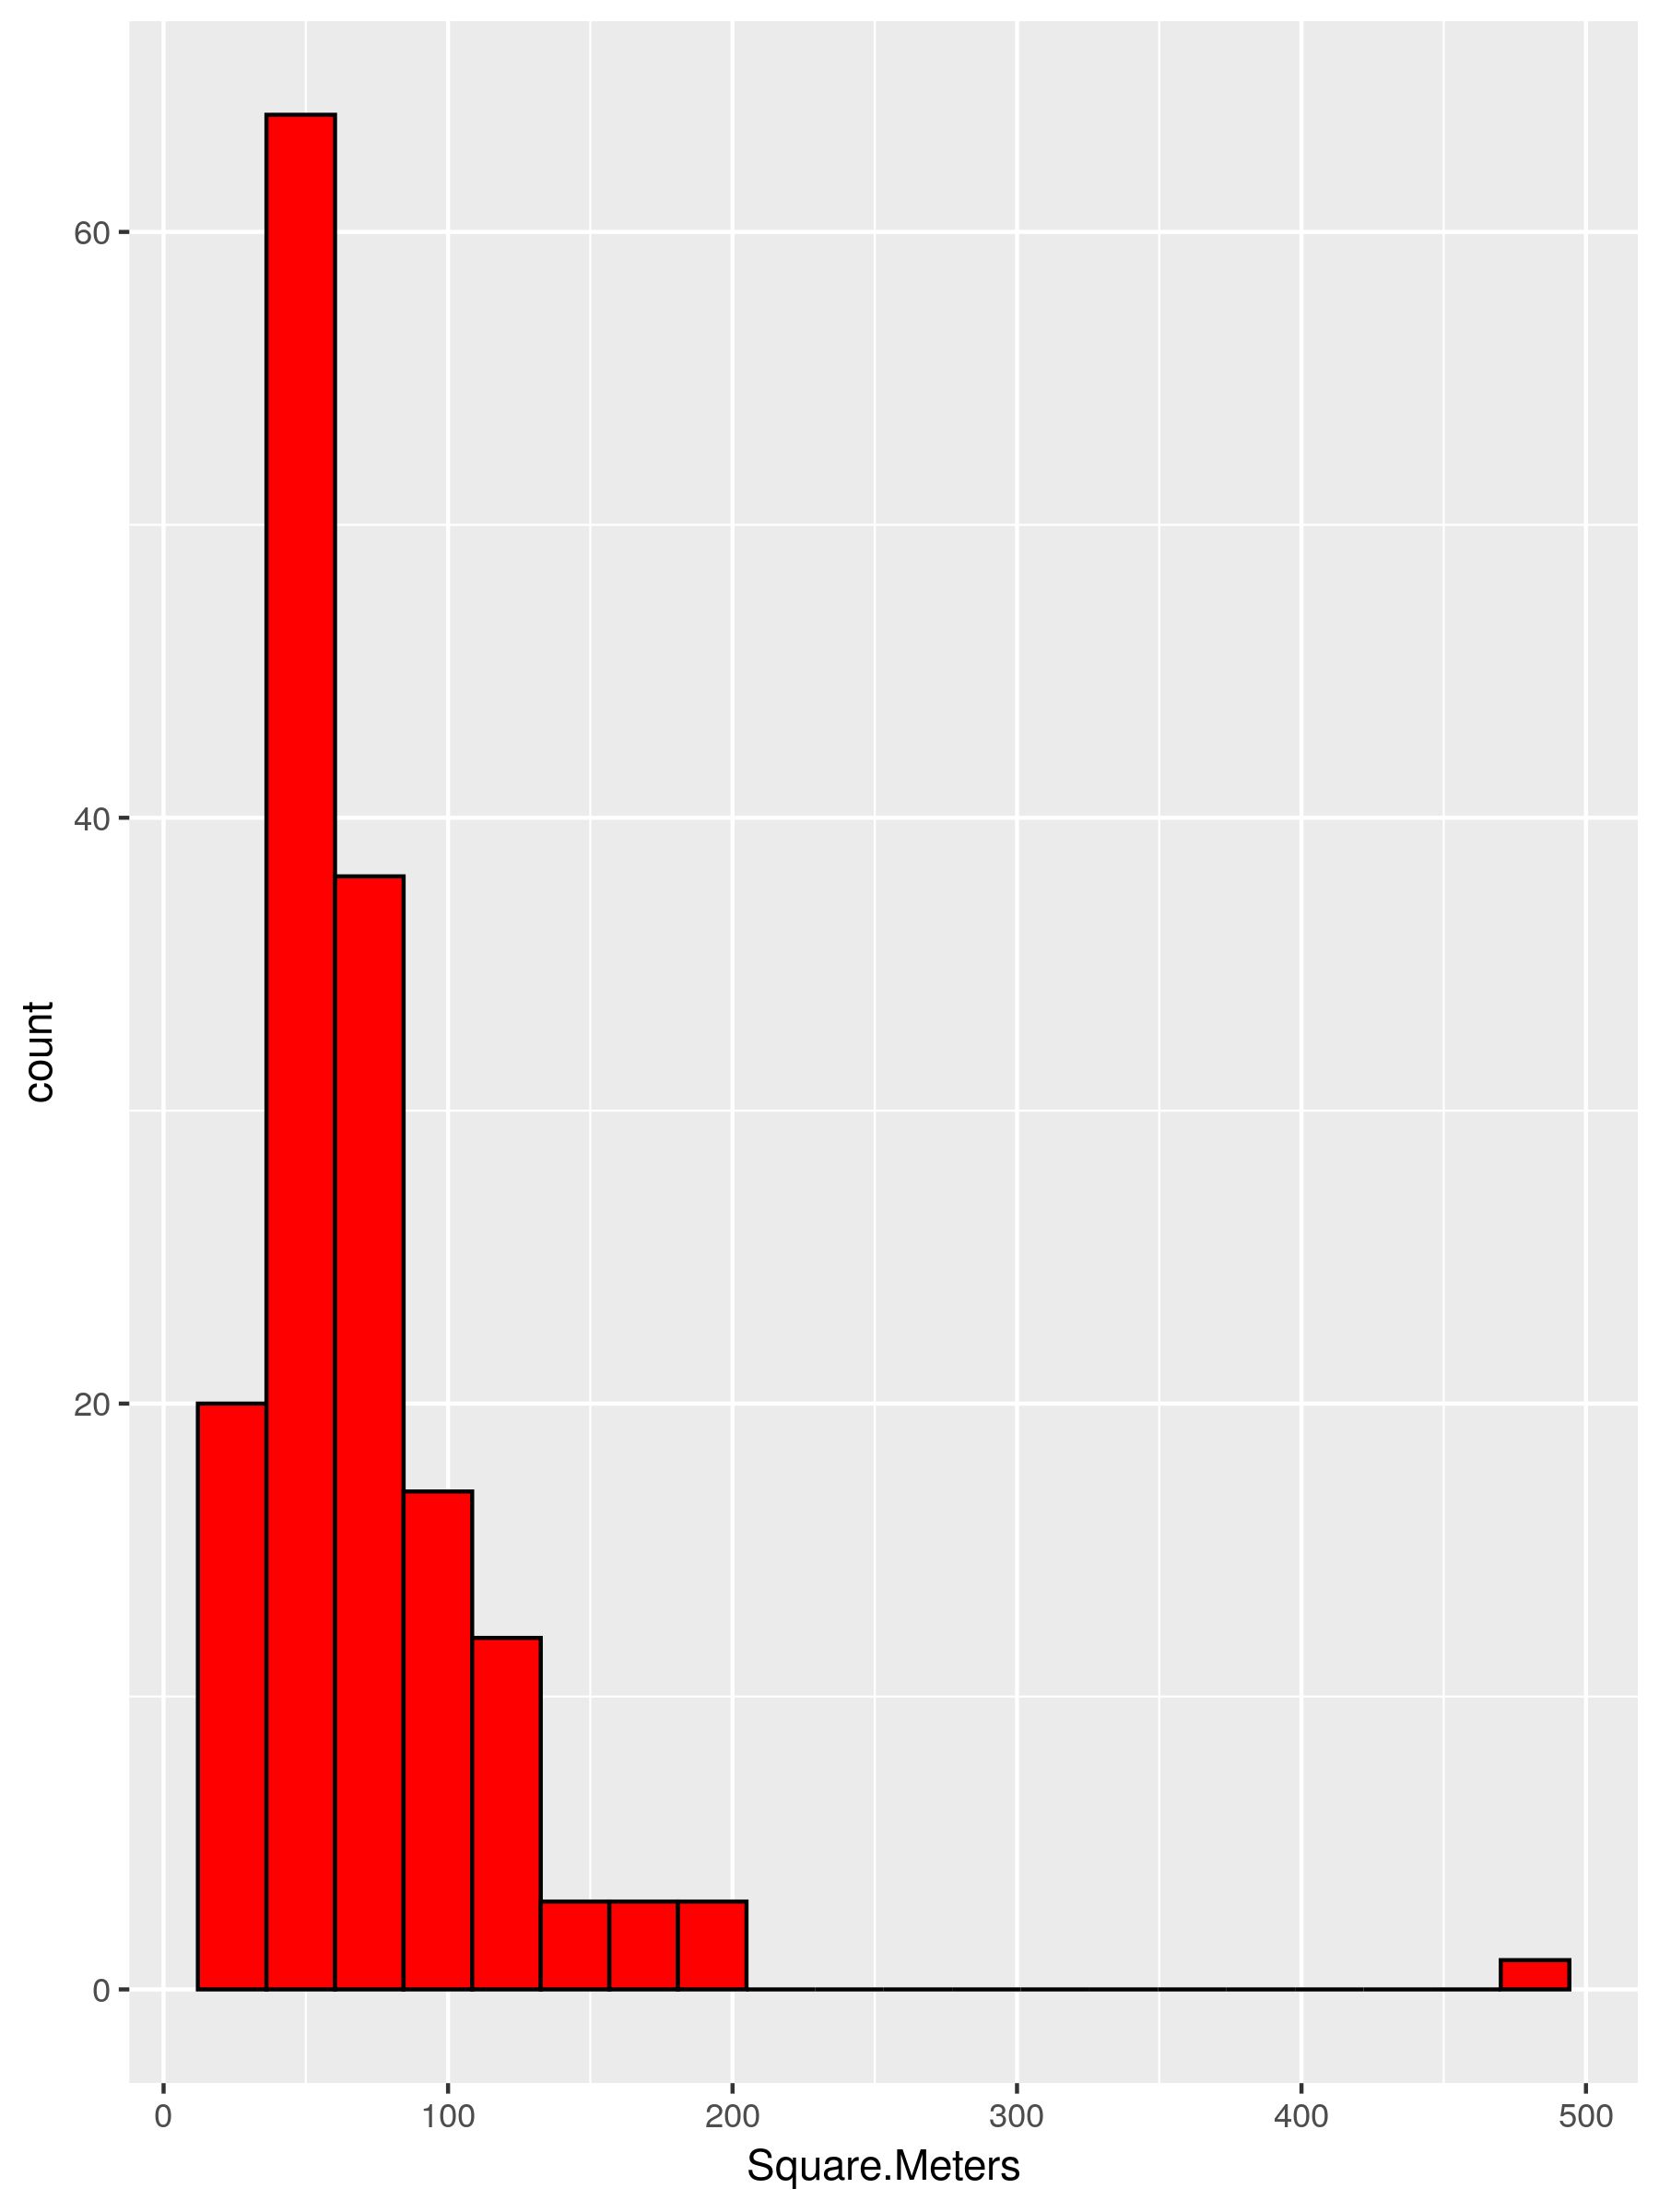

In [32]:
ggplot(train, aes(x=Square.Meters)) + geom_histogram(bins=20, col='black', fill='red')

## <font color='red'>**Comentarios**</font>

Aquí pedía el histograma de los residuos sobre el conjunto de test. Eso sería así:

Warning message:
“Removed 478 rows containing non-finite values (stat_bin).”


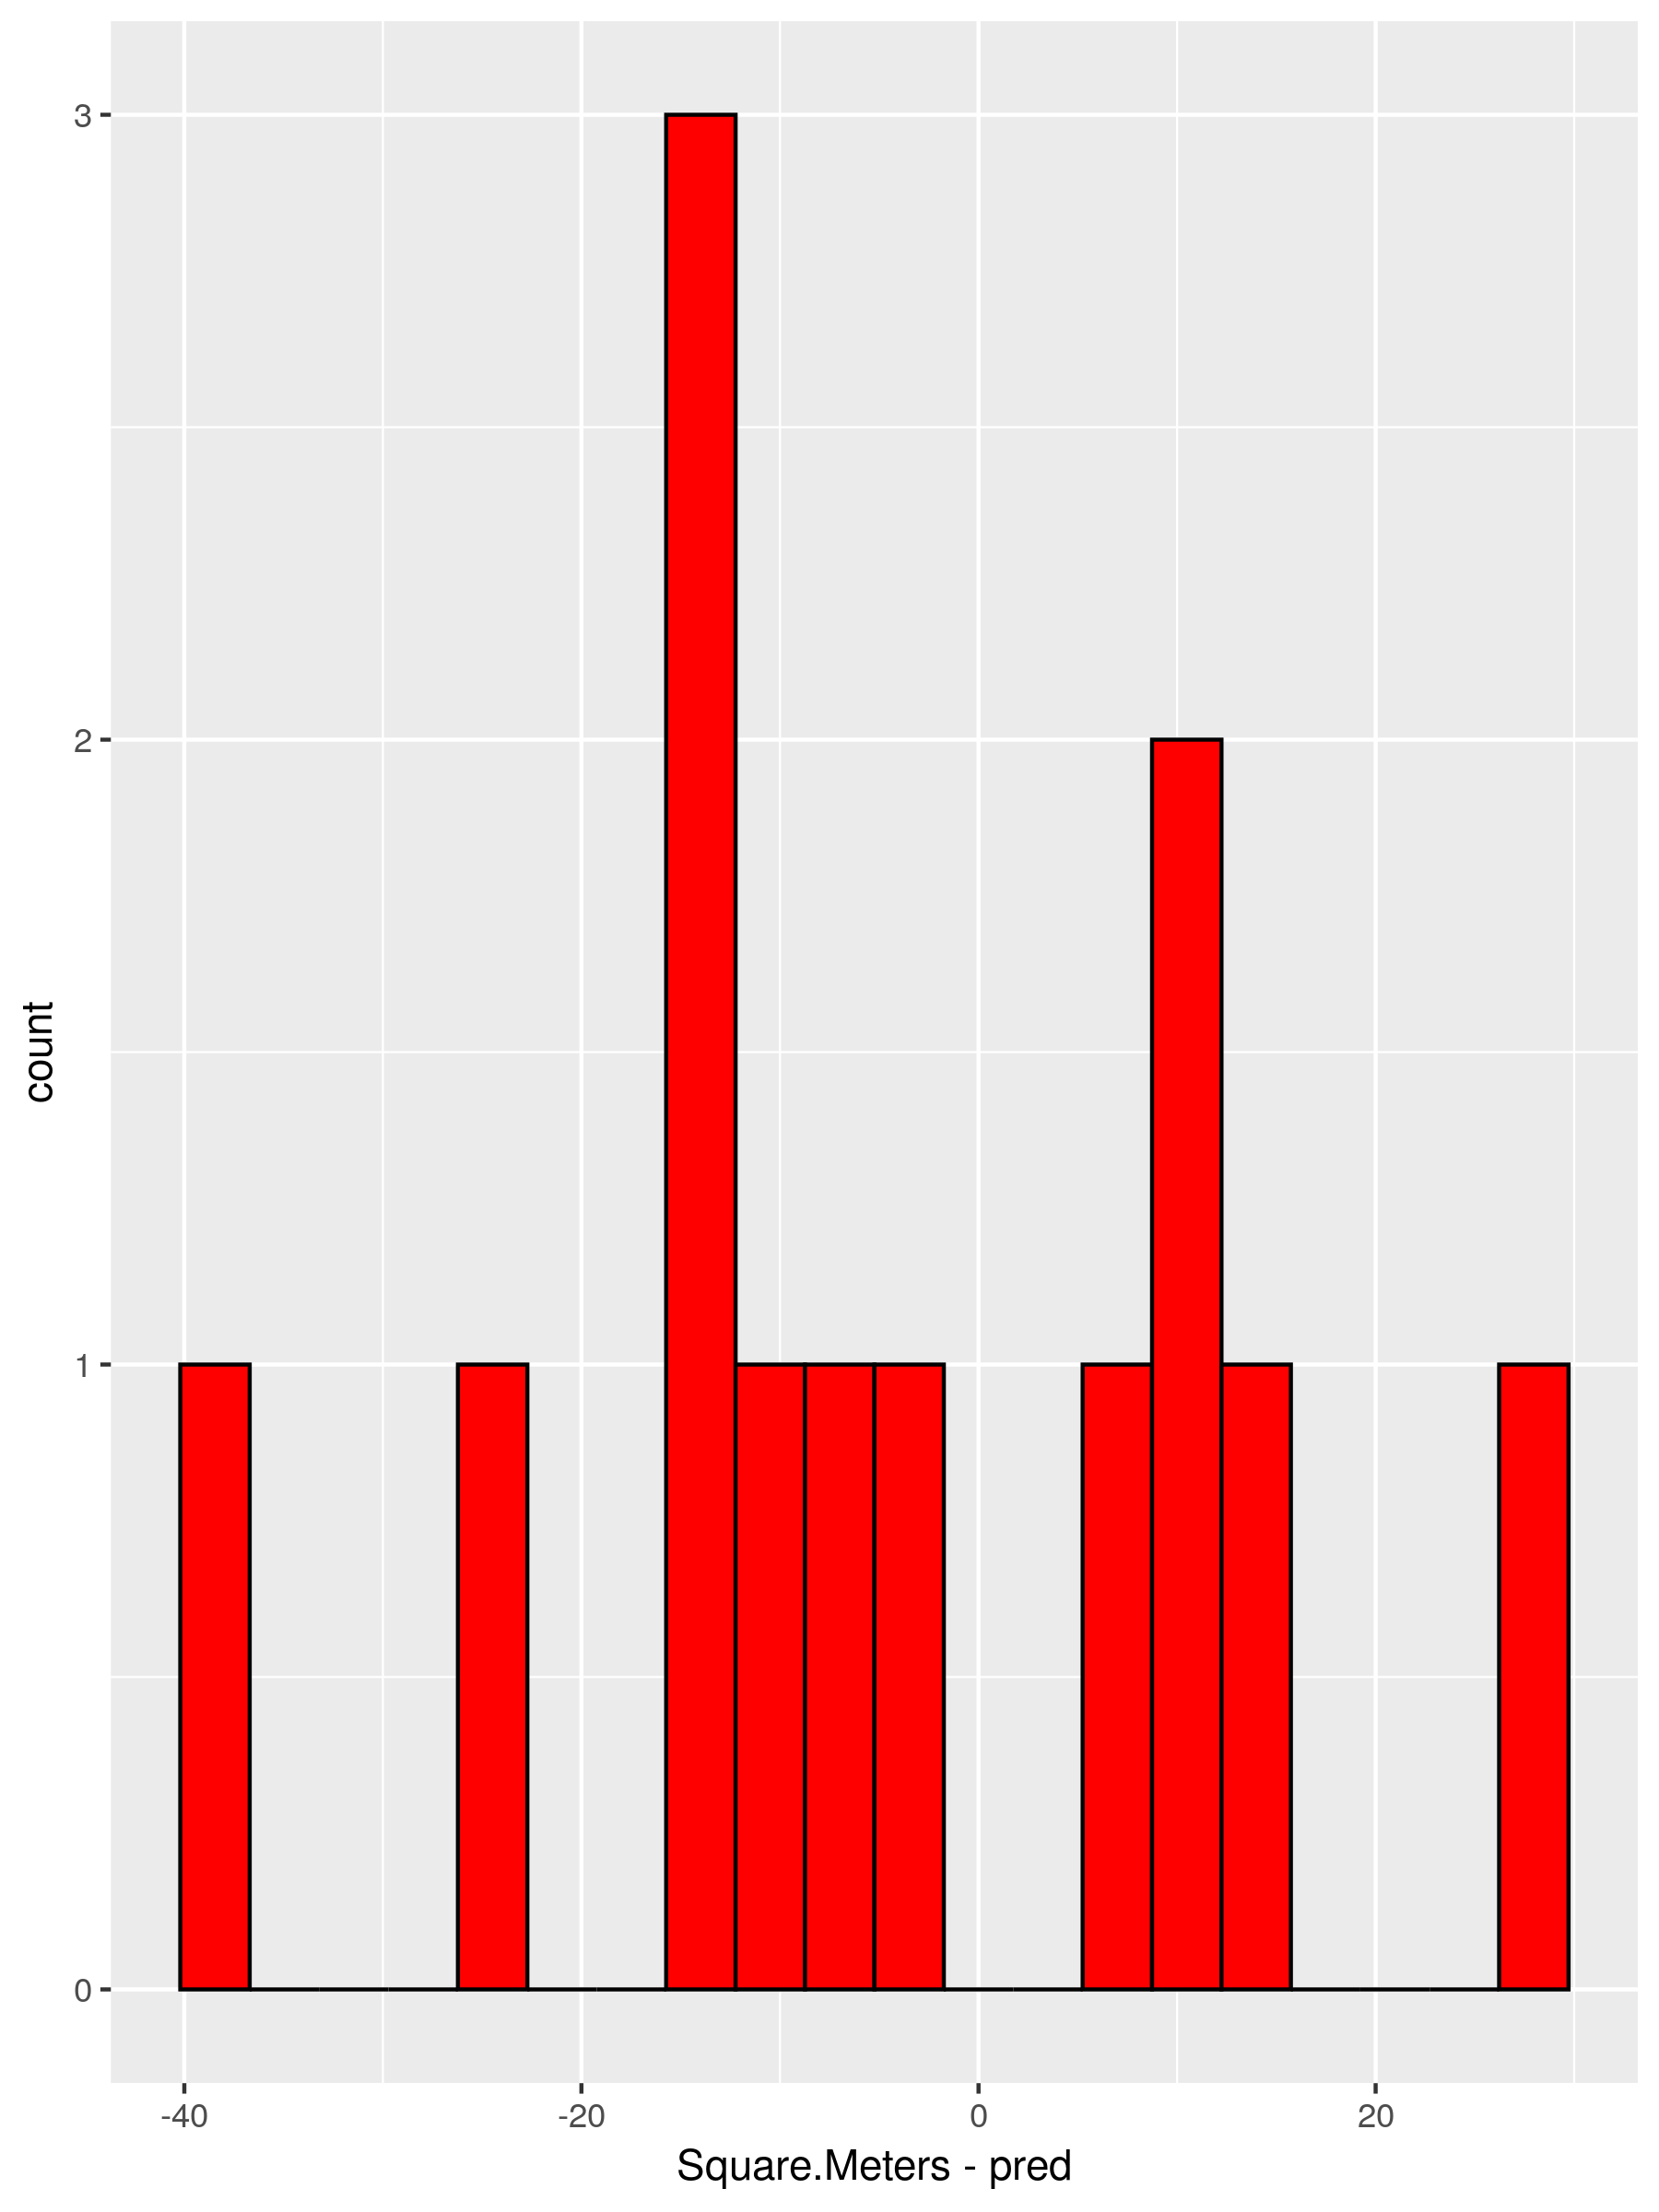

In [41]:
test$pred<-predict(modelo,test)
ggplot(test, aes(x=Square.Meters-pred)) + geom_histogram(bins=20, col='black', fill='red')

## <font color='red'>**Comentarios**</font>

Es interesante analizar los residuos no solo del conjunto de training sino también de test. 

Sería interesante que hubieras comparado el R^2 o el RMSE de los grupos de test y training para ver si tienes overfitting.

En este caso no lo tienes problemas de overfitting y los residuos no tienen mala pinta.



In [42]:
df_preds<-data.frame(obs=train$Square.Meters,pred=predict(modelo,train))
df_preds<-na.omit(df_preds)
caret::postResample(df_preds$pred,df_preds$obs)

df_preds<-data.frame(obs=test$Square.Meters,pred=predict(modelo,test))
df_preds<-na.omit(df_preds)
caret::postResample(df_preds$pred,df_preds$obs)

RMSE   Rsquared        MAE 
30.0937048  0.5871033 18.3712974

RMSE   Rsquared        MAE 
17.8170055  0.8158015 14.9412325

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [548]:
apartamento <- data.frame(Neighbourhood = "Sol",Bedrooms=3, Price=80, Accommodates=6)
predicApartamentoM2 <- predict(modelo,apartamento)
paste(round(predicApartamentoM2), "Metros cuadrados")

[1] "105 Metros cuadrados"

In [549]:
paste("Por cada habitación adicional varía ")
coef_metros <- summary(modelo)$coefficients
round(coef_metros ["Bedrooms", "Estimate"])
paste("Metros")

[1] "Por cada habitación adicional varía "

[1] 18

[1] "Metros"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

## Este codigo lo he sacado de internet, pero me surge la duda, ¿por que en el summary me sigue apareciendo 12 NA`s, si estoy reemplazando todos por el estimaado anterior? Debería sustituir los valores en la  misma Square.Meters pero lo que hace es crear una nueva y la otra la sustituye.

##RellenarNAestimadoAnterior <- function(x) {
    
    if(is.na(x["Square.Meters"])){
        if(is.na(x["RellenarNAestimadoAnterior"])){
            return(NA)
        }
        return(as.numeric(x["RellenarNAestimadoAnterior"]))
    }
    return(as.numeric(x["Square.Meters"]))
}

df_madrid$RellenarNAestimadoAnterior <- predict.lm(modelo, type="response", newdata=df_madrid)
df_madrid$Square.Meters <- apply(df_madrid,1,RellenarNAestimadoAnterior)

summary(df_madrid)

## <font color='red'>**Comentarios**</font>

El código está bien lo único que para la predicción usas las variables Accommodates, Price y Bedrooms. Si para una apartamento una de esas variables es NA el resultado será NA.


El join siguiente:
```
df_madrid <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 
```
no es necesario. Ya añadiste anteriormente al dataframe df_madrid la columna neighb_id.

La tabla df_barrios solo tiene dos columnas: names y neighb_id. Y estás haciendo el join(), estas añadiendo una columna neighb_id que ya existe, así que te deja la columna original y le añade el sufijo .x, a la columna nueva de df_barrios le añade el sufijo .y

In [45]:
## Probando tú código si sutituye los valores en la columna Square.Meters pero
## me crea dos columnas nuevas que no se por que neighb_id.x y neighb_id.y

df_madrid <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)]<-
 round(predict(modelo,df_madrid[is.na(df_madrid$Square.Meters),]))

summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4901        Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.00  
                    Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :10.00  
                                     NA's   :14      NA's   :7      
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 1.954   Mean   :  9.019  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :80

In [ ]:
## En conclusión, mi modelo con un error del 30% no puedo decir que sea muy fiable, 
## necesitaria mas instancias y elejir otra combinación de variables.

## <font color='red'>**Comentarios**</font>

¿De donde sacas que el error es el 30%? ¿El error de que?
En clasificación mediamos fácilmente el valor de error porque teníamos aciertos/fallos.

Pero en regresión la cosa se complica, tenemos medidas como el R^2, MSE (que los podemos sacar como expliqué unas lineas más arriba con la función aret::postResample), pero para definir un error del 30% deberías decir de que.
¿De un intervalo de confianza del residuo?

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [60]:
## Eliminamos los NA´s
df_madrid_pca<-na.omit(df_madrid[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude",
                                           "Beds","Price","Review.Scores.Rating","Square.Meters",'neighb_id.x','neighb_id.y')])

In [61]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters    neighb_id.x  nei

In [62]:
## Eliminamos las columnas neighb_id.x y neighb_id.y ya que no necesitamos,
## la introducimos en dataset para hacer el clusster
#df_madrid_pca$neighb_id.x <- NULL
#df_madrid_pca$neighb_id.y <- NULL


In [63]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters    neighb_id.x  nei

In [64]:
pcaMatrix = data.matrix(df_madrid_pca)
pcaMatrix[sample(1:nrow(pcaMatrix),5),1:9]

Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
2702 5            2         2        40.40519 -3.706163 2    120  
2039 4            1         1        40.40829 -3.693428 2     70  
1696 4            1         1        40.41134 -3.708571 2    130  
1258 4            1         2        40.42243 -3.702072 3     56  
2083 4            1         1        40.42354 -3.679413 2     75  
     Review.Scores.Rating Square.Meters
2702  95                  84           
2039 100                  54           
1696  95                  61           
1258 100                  69           
2083  78                  55

In [55]:
#pca <- prcomp(df_madrid_pca,center = TRUE, scale. = TRUE)

In [65]:
pca <- prcomp(df_madrid_pca %>% select(-neighb_id.x, -neighb_id.y),center = TRUE, scale. = TRUE)

In [66]:
str(pca)

List of 5
 $ sdev    : num [1:9] 2.135 1.172 1.006 0.819 0.763 ...
 $ rotation: num [1:9, 1:9] 0.4229 0.3681 0.4194 0.0196 0.0384 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 4.13 1.24 1.42 40.42 -3.7 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ scale   : Named num [1:9] 1.9002 0.5035 0.9462 0.0117 0.0149 ...
  ..- attr(*, "names")= chr [1:9] "Accommodates" "Bathrooms" "Bedrooms" "Latitude" ...
 $ x       : num [1:4187, 1:9] -0.768 0.343 5.63 0.666 -0.149 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4187] "1" "2" "3" "4" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [67]:
## Matriz de autovalores
pca$sdev[1:9]

[1] 2.1347653 1.1716519 1.0063548 0.8186117 0.7629300 0.5776166 0.5355012
[8] 0.4033380 0.1482826

In [68]:
pcaSummary <- summary(pca)
pcaSummary
paste("En PC3 tenemos mas del 75% de la información y en PC5 el 91%")

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1348 1.1717 1.0064 0.81861 0.76293 0.57762 0.53550
Proportion of Variance 0.5064 0.1525 0.1125 0.07446 0.06467 0.03707 0.03186
Cumulative Proportion  0.5064 0.6589 0.7714 0.84587 0.91055 0.94762 0.97948
                           PC8     PC9
Standard deviation     0.40334 0.14828
Proportion of Variance 0.01808 0.00244
Cumulative Proportion  0.99756 1.00000

[1] "En PC3 tenemos mas del 75% de la información y en PC5 el 91%"

In [69]:
pca$x[1,1:9]

PC1          PC2          PC3          PC4          PC5          PC6 
-0.768419140  1.073739920  0.836635216  0.513513033  1.200975780 -0.089037190 
         PC7          PC8          PC9 
 0.131994895  0.198188485  0.002352879

In [70]:
pic<-(pcaMatrix %*% t(pca$rotation))*pca$scale+pca$center
summary(array(pic))
#Debido a errores de redondeo
pic[pic<0]<-0
pic[pic>1]<-1
dim(pic)

ERROR: Error in pcaMatrix %*% t(pca$rotation): non-conformable arguments


## <font color='red'>**Comentarios**</font>

Esto de limitar los valores a que como mucho valgan 0 o 1 es solo válido para el ejemplo de las imágenes. Un pixel podría tener un valor válido entre 0 y 1, aquí carece de sentido.

In [71]:
apartamento <- pcaApartamentos %*% t(pca$rotation)
summary(array(apartamento))
pic <- (apartamento - min(apartamento))
pic <- apartamento / max(apartamento)
apartamento

ERROR: Error in eval(expr, envir, enclos): object 'pcaApartamentos' not found


In [73]:
paste("Una media de apartamento sería este. No lo pide el ejercicio pero puede ser una opción de busqueda.")
apartamentoMedio <- colSums(pcaMatrix) / nrow(pcaMatrix)
round(mean_appartment)

[1] "Una media de apartamento sería este. No lo pide el ejercicio pero puede ser una opción de busqueda."

ERROR: Error in eval(expr, envir, enclos): object 'mean_appartment' not found


In [75]:
funcionApartamento <- function(pca, new_flat,num_flats){
    pca_new <- predict(pca,newdata = new_flat)
    pca_orig <- pca$x[,1:2]
    pca_new <- pca_new[,1:2]

    idx <- order(rowSums((pca_new - pca_orig)^2))
    df_madrid_pca[idx %in% 1:num_flats,]
}

In [76]:
## He adaptado tu función a mi código por que no encontraba la forma de hacerla, 
## al pricipio decidí eliminar las columnas neighb_id.x, neighb_id.y ya que nos servian para el cluster, 
## pero no conseguia adaptar tu funcion a esa decisión, al pasarle a la funcion apartamentoMedio lo que hago es 
## buscar los los 5 apartamentos similares a apartamentoMedio.
## Creo no que me ha quedado del todo claro si he hecho bien PCA, pero lo que queria buscar es lo que comentaba antes.
## En el ejemplo de las fotos si he entendido el proceso y su función.

selecColDataset <- (df_madrid_pca %>% select(-neighb_id.x, -neighb_id.y))[9,]
selecColDataset
funcionApartamento(pca,selecColDataset,5)

Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
11 3            1         1        40.4469  -3.676409 1    75   
   Review.Scores.Rating Square.Meters
11 80                   48

Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
477  3            1         0        40.42122 -3.700556 2     90  
2053 4            1         1        40.41392 -3.707618 1     59  
2775 4            1         1        40.42083 -3.709258 2     72  
4276 4            1         0        40.42057 -3.705314 2     85  
4797 6            2         2        40.41181 -3.697104 5    100  
     Review.Scores.Rating Square.Meters neighb_id.x neighb_id.y
477  97                   33            1           1          
2053 92                   53            2           2          
2775 89                   54            1           1          
4276 94                   39            1           1          
4797 97                   88            1           1

## <font color='red'>**Comentarios**</font>

He modificado el código de las últimas dos celdas para hacerlo funcionar, supongo que lo habías ejecutado varias veces, tenias diferentes variables en memoria y por eso te funcionaba.

Responidendo a tu pregunta, se trata de hacer un PCA del dataset filtrado por las columnas que indico y quedarte con los componentes principales más importantes. Has hecho muy bien en eliminar la columna neighb_id para el PCA, son factores y no se puede aplicar a este tipo de análisis.

Una vez que tengas el PCA hecho. Luego cuando venga un nuevo apartamento, aplicas la matriz de rotación sobre dicho nuevo apartamiento para pasarlo al dominio PCA y simplemente buscas cual es el apartamento del dataset original que más se parece (menor distancia euclidea) 

¿Como defines que 2 pisos se parecen? Pues PCA te da una respuesta matemática, a lo mejor a una persona no le gusta tanto, pero la interpretabilidad no es el punto que estamos viendo ahora.

Es similar al ejemplo que teniamos con las caras, encuentra la cara más similar a esta otra que nunca ha visto. Lo unico que con las caras ibamos un paso más allá y decíamos que la cara era de Bush si a la cara que más se parecía era de Bush.



Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?